# <span style="color:purple"> Pandas Notebook 2, ATM350 Spring 2023 </span>

## Motivating Science Questions:
1. What was the daily temperature and precipitation at Albany last year?
2. What were the the days with the most precipitation?

## Motivating Technical Question:
1. How can we use Pandas to do some basic statistical analyses of our data?

### We'll start by repeating some of the same steps we did in the first Pandas notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

In [4]:
file = '/spare11/atm350/common/data/climo_alb_2022.csv'

Display the first five lines of this file using Python's built-in `readline` function

In [5]:
fileObj = open(file)
nLines = 5
for n in range(nLines):
    line = fileObj.readline()
    print(line)

DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT

2022-01-01,51,41,46.0,19.7,19,0,0.12,0.0,0

2022-01-02,49,23,36.0,9.9,29,0,0.07,0.2,0

2022-01-03,23,13,18.0,-7.9,47,0,T,T,T

2022-01-04,29,10,19.5,-6.2,45,0,T,0.1,T



In [6]:
df = pd.read_csv(file, dtype='string')

nRows = df.shape[0]
print ("Number of rows = %d" % nRows )
nCols = df.shape[1]
print ("Number of columns = %d" % nCols)

date = df['DATE']
date = pd.to_datetime(date,format="%Y-%m-%d")

maxT = df['MAX'].astype("float32")
minT = df['MIN'].astype("float32")

Number of rows = 365
Number of columns = 10


### Let's generate the final timeseries we made in our first Pandas notebook, with all the "bells and whistles" included.

In [7]:
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator

Set the year so we don't have to edit the string labels every year!

In [8]:
year = 2022

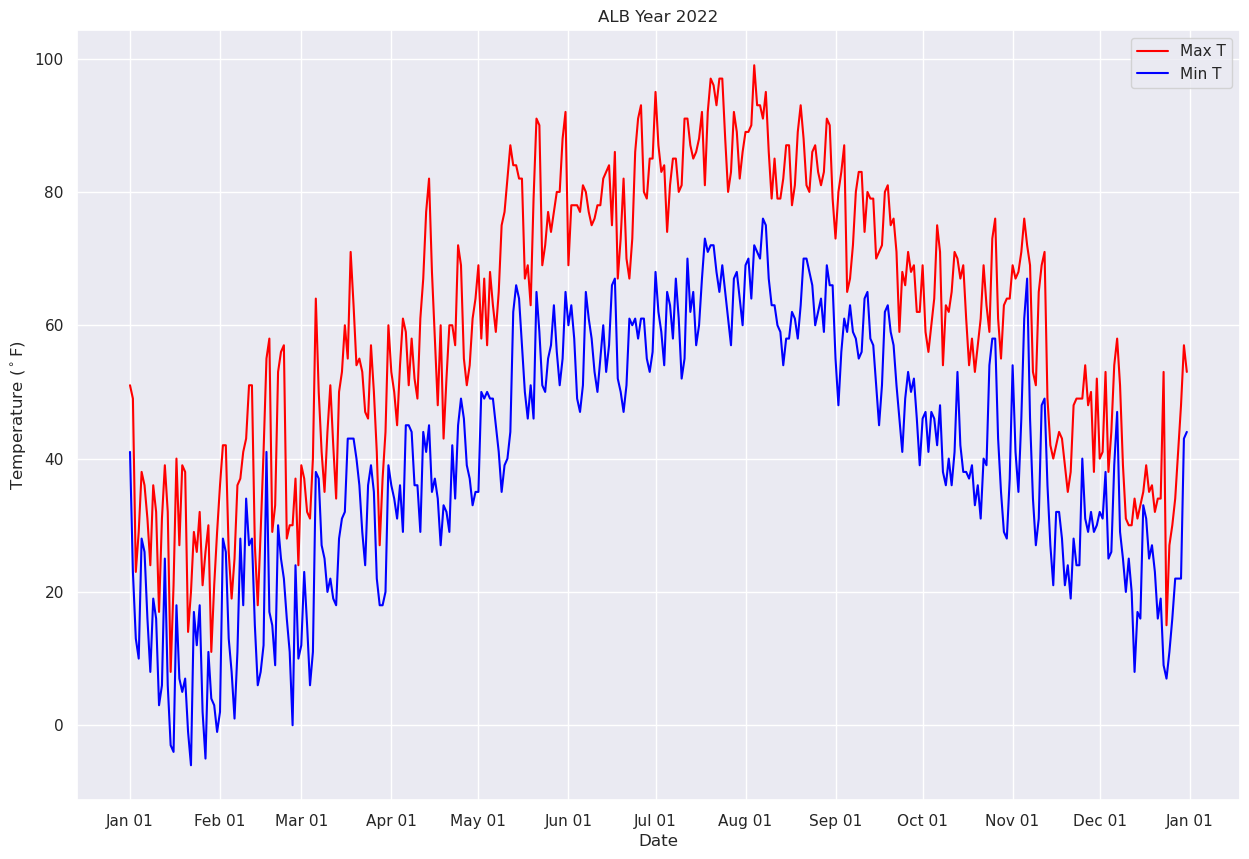

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, maxT, color='red',label = "Max T")
ax.plot (date, minT, color='blue', label = "Min T")
ax.set_title ("ALB Year %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

## Read in precip data. This will be more challenging due to the presence of T(races).
Let's remind ourselves what the `Dataframe` looks like, paying particular attention to the daily precip column (**PCP**).

In [10]:
df

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
0,2022-01-01,51,41,46.0,19.7,19,0,0.12,0.0,0
1,2022-01-02,49,23,36.0,9.9,29,0,0.07,0.2,0
2,2022-01-03,23,13,18.0,-7.9,47,0,T,T,T
3,2022-01-04,29,10,19.5,-6.2,45,0,T,0.1,T
4,2022-01-05,38,28,33.0,7.5,32,0,0.00,0.0,T
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,34,22,28.0,0.6,37,0,0.00,0.0,T
361,2022-12-28,41,22,31.5,4.3,33,0,0.00,0.0,T
362,2022-12-29,48,22,35.0,8.1,30,0,0.00,0.0,T
363,2022-12-30,57,43,50.0,23.3,15,0,0.00,0.0,0


<div class="alert alert-warning"> <b>Exercise:</b> define a Pandas <code>DataSeries</code> called <code>precip</code> and populate it with the requisite column from our <code>Dataframe</code>. Then print out its values.</div>

<div class="alert alert-success"> <b>TIP:</b> After you have tried on your own, you can uncomment the first line of the cell below and re-run to <i>load</i> the solution.</div>

In [11]:
# %load /spare11/atm350/common/feb23/02a.py
precip = df['PCP']
print('This is the precip values:')
precip

This is the precip values:


0      0.12
1      0.07
2         T
3         T
4      0.00
       ... 
360    0.00
361    0.00
362    0.00
363    0.00
364    0.08
Name: PCP, Length: 365, dtype: string

## The task now is to convert these values from strings to floating point values. Our task is more complicated due to the presence of strings that are clearly not numerical ... such as "T" for *trace*.


### As we did in the first Pandas notebook with max temperatures greater than or equal to 90, create a subset of our `Dataframe` that consists only of those days where precip was a trace.

In [12]:
traceDays = df[precip=='T']
traceDays

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
2,2022-01-03,23,13,18.0,-7.9,47,0,T,T,T
3,2022-01-04,29,10,19.5,-6.2,45,0,T,0.1,T
9,2022-01-10,32,16,24.0,-0.6,41,0,T,T,T
13,2022-01-14,32,6,19.0,-5.1,46,0,T,T,T
17,2022-01-18,27,7,17.0,-6.8,48,0,T,T,3
19,2022-01-20,38,7,22.5,-1.2,42,0,T,T,2
24,2022-01-25,32,18,25.0,1.4,40,0,T,0.1,3
27,2022-01-28,30,11,20.5,-3.2,44,0,T,0.1,2
38,2022-02-08,37,28,32.5,7.4,32,0,T,T,2
41,2022-02-11,51,27,39.0,13.3,26,0,T,T,2


In [13]:
traceDays.shape

(54, 10)

In [14]:
traceDays.shape[0]

54

<div class="alert alert-warning"> <b>Exercise:</b> print out the total # of days where a trace of precip was measured. <b><i>Hint</i></b>: look back at how we calculated the total # of 90 degree days in our first Pandas notebook ... we used the <code>shape</code> attribute.</div>

In [15]:
# %load /spare11/atm350/common/feb23/02b.py
print (df[precip=='T'].shape)
numTraceDays = df[precip == 'T'].shape[0]
print ("The total # of days in Albany in %d that had a trace of precipitation was %d" % (year, numTraceDays))


(54, 10)
The total # of days in Albany in 2022 that had a trace of precipitation was 54


### Getting back to our task of converting precip amounts from strings to floating point numbers, one thing we could do is to create a new array and populate it via a loop, where we'd use an `if-else` logical test to check for Trace values and set the precip value to 0.00 for each day accordingly.

### There is a more efficient way to do this, though! 
See https://stackoverflow.com/questions/49154068/fixing-a-typeerror-when-using-pandas-after-replacing-a-string-with-a-floating-po?rq=1 

## We use the `loc` method of Pandas to find all elements of a DataSeries with a certain value, and then change that value to something else, all in the same line of code!

### In this case, let's set all values of 'T' to '0.00'

The line below is what we want! Before we execute it, let's break it up into pieces.
``` 
df.loc[df['PCP'] =='T', ['PCP']] = '0.00'
```

#### First, create a `Series` of booleans corresponding to the specified condition.

In [16]:
df['PCP'] == 'T'

0      False
1      False
2       True
3       True
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Name: PCP, Length: 365, dtype: boolean

#### Next, build on that cell by using `loc` to display all rows that correspond to the condition being True.

In [17]:
df.loc[df['PCP'] == 'T']

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
2,2022-01-03,23,13,18.0,-7.9,47,0,T,T,T
3,2022-01-04,29,10,19.5,-6.2,45,0,T,0.1,T
9,2022-01-10,32,16,24.0,-0.6,41,0,T,T,T
13,2022-01-14,32,6,19.0,-5.1,46,0,T,T,T
17,2022-01-18,27,7,17.0,-6.8,48,0,T,T,3
19,2022-01-20,38,7,22.5,-1.2,42,0,T,T,2
24,2022-01-25,32,18,25.0,1.4,40,0,T,0.1,3
27,2022-01-28,30,11,20.5,-3.2,44,0,T,0.1,2
38,2022-02-08,37,28,32.5,7.4,32,0,T,T,2
41,2022-02-11,51,27,39.0,13.3,26,0,T,T,2


#### Further build this line of code by only returning the column of interest.

In [18]:
df.loc[df['PCP'] =='T', ['PCP']]

,PCP
2,T
3,T
9,T
13,T
17,T
19,T
24,T
27,T
38,T
41,T


#### Finally, we have arrived at the full line of code! Take the column of interest, in this case precip only on those days where a trace was measured, and set its value to 0.00.

In [19]:
df.loc[df['PCP'] =='T', ['PCP']] = '0.00'

In [20]:
df['PCP']

0      0.12
1      0.07
2      0.00
3      0.00
4      0.00
       ... 
360    0.00
361    0.00
362    0.00
363    0.00
364    0.08
Name: PCP, Length: 365, dtype: string

### This operation actually modifies the `Dataframe` *in place* . We can prove this by printing out a row from a date that we know had a trace amount.

### But first how do we simply print a specific row from a dataframe? Since we know that Jan. 3 had a trace of precip,  try this:

In [21]:
jan03 = df['DATE'] == '2022-01-03'
jan03

0      False
1      False
2       True
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Name: DATE, Length: 365, dtype: boolean

#### That produces a series of booleans; the one matching our condition is `True`. Now we can retrieve all the values for this date.

In [22]:
df[jan03]

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
2,2022-01-03,23,13,18.0,-7.9,47,0,0.00,T,T


#### We see that the precip has now been set to 0.00.

### Having done this check, and thus re-set the values, let's now convert this series into floating point values.

In [23]:
precip = df['PCP'].astype("float32")

In [24]:
precip

0      0.12
1      0.07
2      0.00
3      0.00
4      0.00
       ... 
360    0.00
361    0.00
362    0.00
363    0.00
364    0.08
Name: PCP, Length: 365, dtype: float32

### Plot each day's precip total.

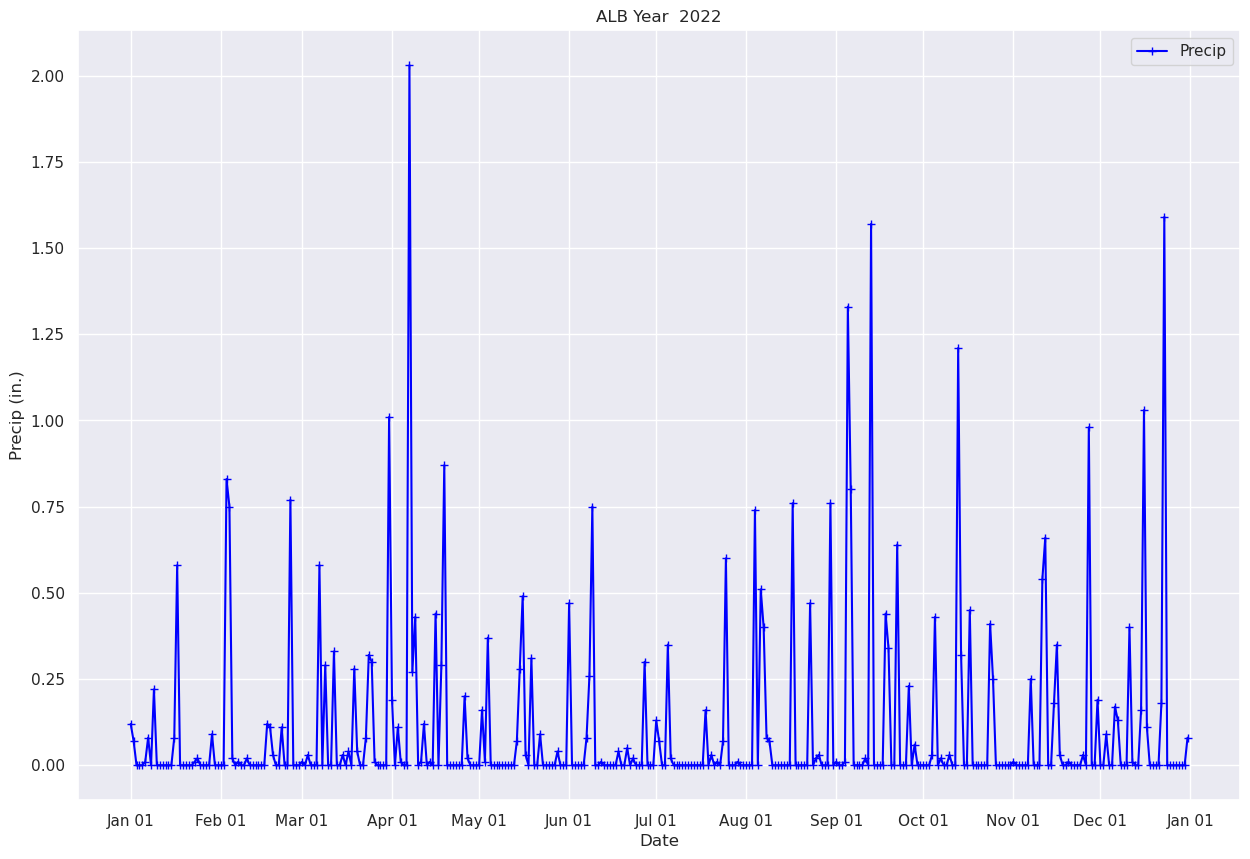

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, precip, color='blue', marker='+',label = "Precip")
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Precip (in.)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

### What if we just want to pick a certain time range? One simple way is to just pass in a subset of our x and y to the `plot` method.

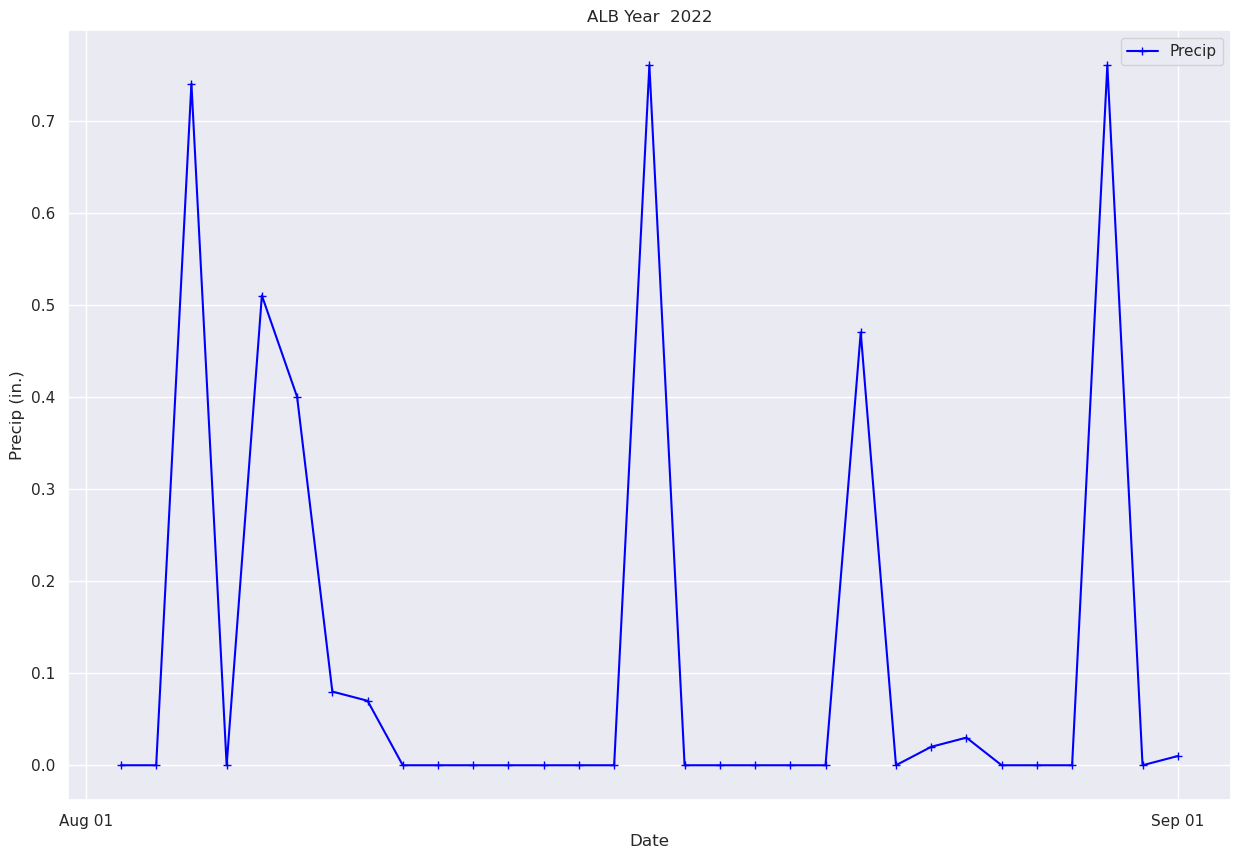

In [26]:
# Plot out just the trace for October. Corresponds to Julian days 214-245 ... thus, indices 213-244 (why?).
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date[213:244], precip[213:244], color='blue', marker='+',label = "Precip")
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Precip (in.)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

<div class="alert alert-warning"> <b>Exercise:</b> print out a table of days with precip amounts of at least <b>1.00</b> inches. In a separate cell, print out the total # of such days.</div>

In [27]:
# %load '/spare11/atm350/common/feb23/02c.py'
wetDays = df[precip>=1.00]
wetDays
# Split the cell here so the table above will be displayed!
numWetDays = wetDays.shape[0]
print ("The total # of days in Albany in %d that had at least 1.00 in. of precip was %d" % (year, numWetDays))


The total # of days in Albany in 2022 that had at least 1.00 in. of precip was 7


### Pandas has a function to compute the cumulative sum of a series. We'll use it to compute and graph Albany's total precip over the year.

In [28]:
precipTotal = precip.cumsum()

In [29]:
precipTotal

0       0.120000
1       0.190000
2       0.190000
3       0.190000
4       0.190000
         ...    
360    37.219997
361    37.219997
362    37.219997
363    37.219997
364    37.299999
Name: PCP, Length: 365, dtype: float32

### We can see that the final total is in the last element of the precipTotal array. How can we explicitly print out just this value?

### One of the methods available to us in a Pandas DataSeries is `values`. Let's display it:

In [30]:
precipTotal.values

array([ 0.12     ,  0.19     ,  0.19     ,  0.19     ,  0.19     ,
        0.2      ,  0.28     ,  0.28     ,  0.5      ,  0.5      ,
        0.5      ,  0.5      ,  0.5      ,  0.5      ,  0.5      ,
        0.58     ,  1.16     ,  1.16     ,  1.16     ,  1.16     ,
        1.16     ,  1.16     ,  1.17     ,  1.1899999,  1.1899999,
        1.1899999,  1.1899999,  1.1899999,  1.28     ,  1.28     ,
        1.28     ,  1.28     ,  1.28     ,  2.11     ,  2.86     ,
        2.8799999,  2.8799999,  2.8899999,  2.8899999,  2.8899999,
        2.9099998,  2.9099998,  2.9099998,  2.9099998,  2.9099998,
        2.9099998,  2.9099998,  3.0299997,  3.1399996,  3.1699996,
        3.1699996,  3.1699996,  3.2799995,  3.2799995,  3.2799995,
        4.049999 ,  4.049999 ,  4.049999 ,  4.049999 ,  4.0599995,
        4.0599995,  4.0899997,  4.0899997,  4.0899997,  4.0899997,
        4.6699996,  4.6699996,  4.9599996,  4.9599996,  4.9599996,
        5.2899995,  5.2899995,  5.2899995,  5.3199997,  5.3199

<div class="alert alert-warning"> <b>Exercise:</b> It's an array! So, let's print out the last element of the array. What index # can we use?</div>

In [31]:
# %load '/spare11/atm350/common/feb23/02d.py'
# Print out the value of the last element in the array
precipTotal.values[-1]


37.3

### Plot the timeseries of the cumulative precip for Albany over the year.

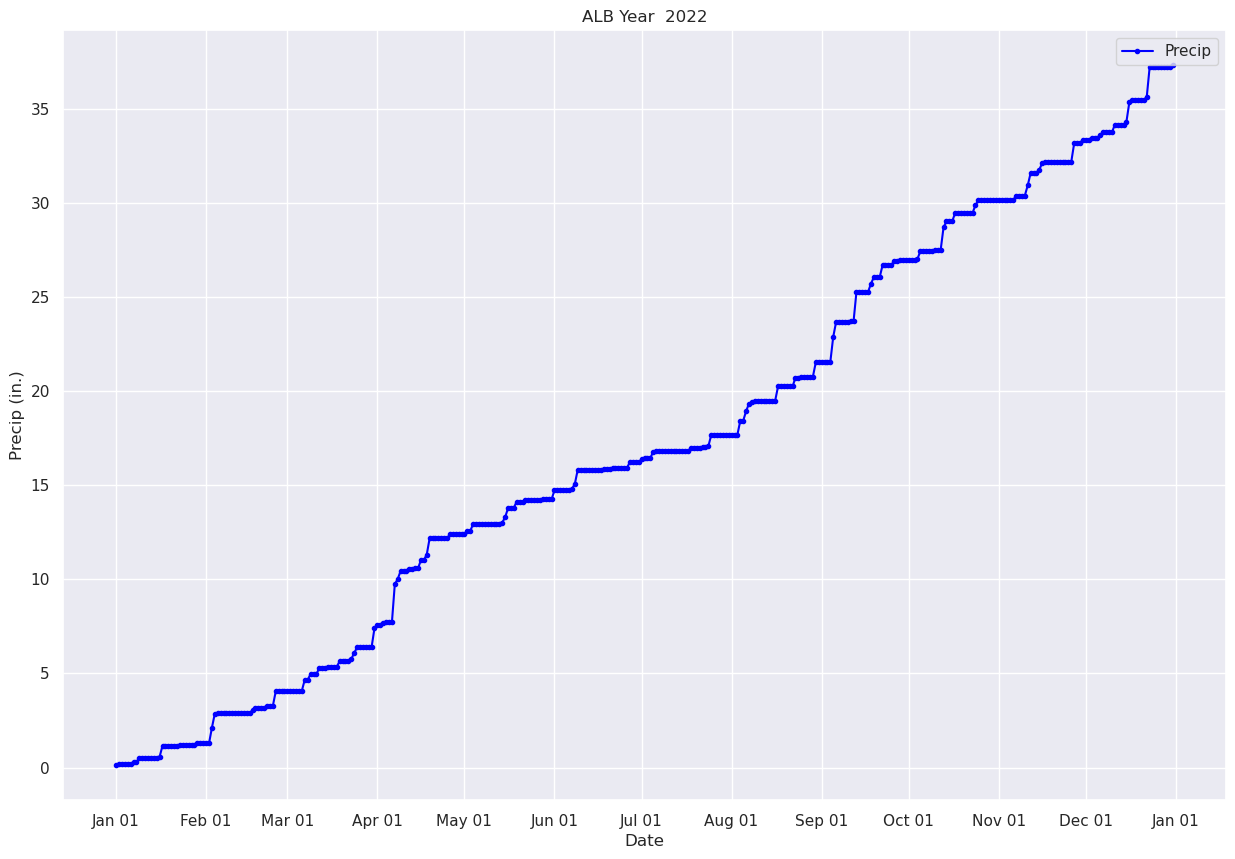

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, precipTotal, color='blue', marker='.',label = "Precip")
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Precip (in.)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

# Pandas has a plethora of statistical analysis methods to apply on tabular data. An excellent summary method is `describe`.

In [33]:
maxT.describe()

count    365.000000
mean      60.915070
std       21.009434
min        8.000000
25%       43.000000
50%       63.000000
75%       79.000000
max       99.000000
Name: MAX, dtype: float64

In [34]:
minT.describe()

count    365.000000
mean      40.490410
std       19.344707
min       -6.000000
25%       27.000000
50%       41.000000
75%       58.000000
max       76.000000
Name: MIN, dtype: float64

In [35]:
precip.describe()

count    365.000000
mean       0.102192
std        0.256473
min        0.000000
25%        0.000000
50%        0.000000
75%        0.040000
max        2.030000
Name: PCP, dtype: float64

<div class="alert alert-warning"> <b>Exercise:</b> Why is the <i>mean</i> 0.10, but the <i>median</i> 0.00? Can you write a code cell that answers this question?
    <b>Hint</b>: determine how many days had a trace or less of precip. 
    <ol><li>First, express the condition where precip is equal to 0.00.</li>
        <li>Then, determine the # of rows of that resulting series.</li>
    </ol>
</div>

In [36]:
# %load /spare11/atm350/common/feb23/02e.py
subset = precip[precip == 0.00]
nRows = subset.shape

print ("The number of days where precip was a trace or less was %d" % nRows)
print ("Since this is represents more than half the days of the years, the median must = 0")


The number of days where precip was a trace or less was 236
Since this is represents more than half the days of the years, the median must = 0


### We'll wrap up by calculating and then plotting *rolling means* over a period of days in the year, in order to smooth out the day-to-day variations.

First, let's replot the max and min temperature trace for the entire year, day-by-day.

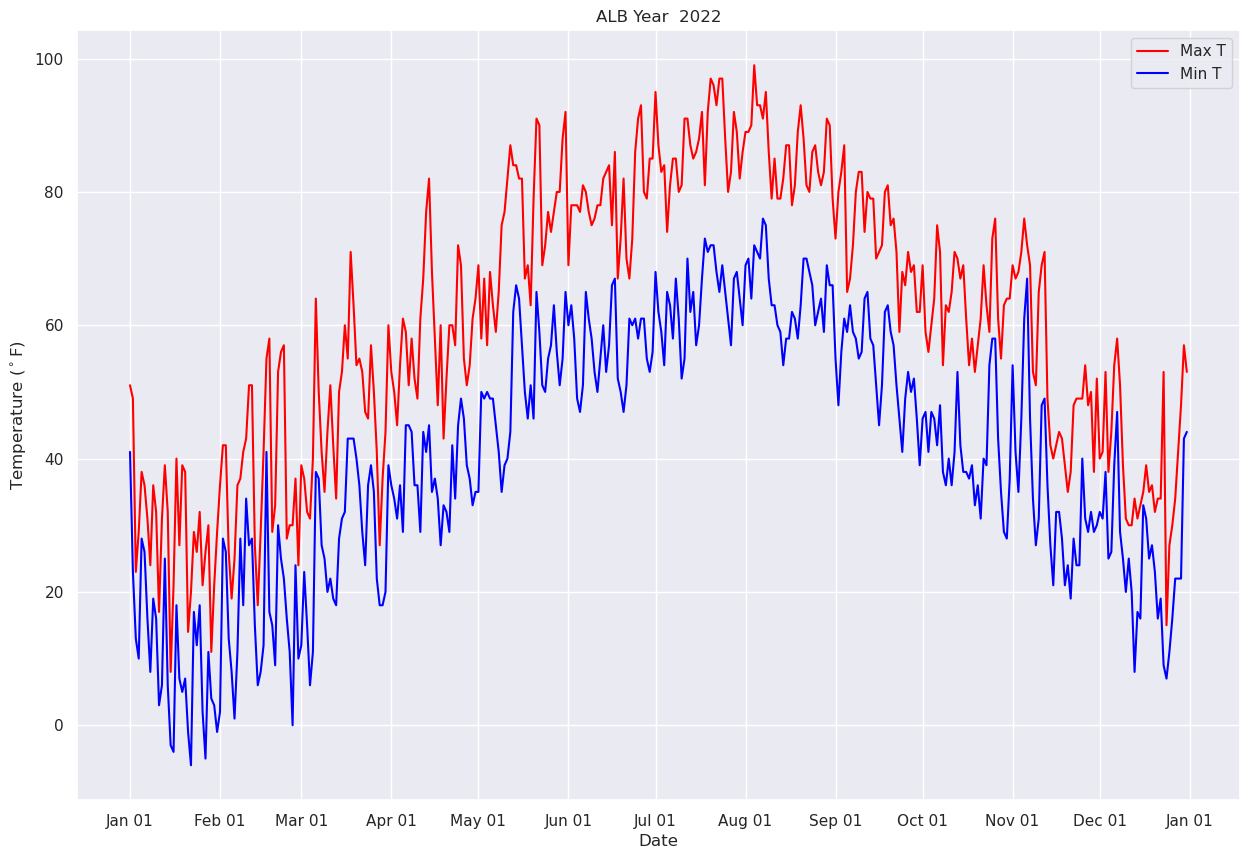

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, maxT, color='red',label = "Max T")
ax.plot (date, minT, color='blue', label = "Min T")
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

Now, let's calculate and plot the daily mean temperature.

In [38]:
meanT = (maxT + minT) / 2.

In [39]:
meanT

0      46.0
1      36.0
2      18.0
3      19.5
4      33.0
       ... 
360    28.0
361    31.5
362    35.0
363    50.0
364    48.5
Length: 365, dtype: float32

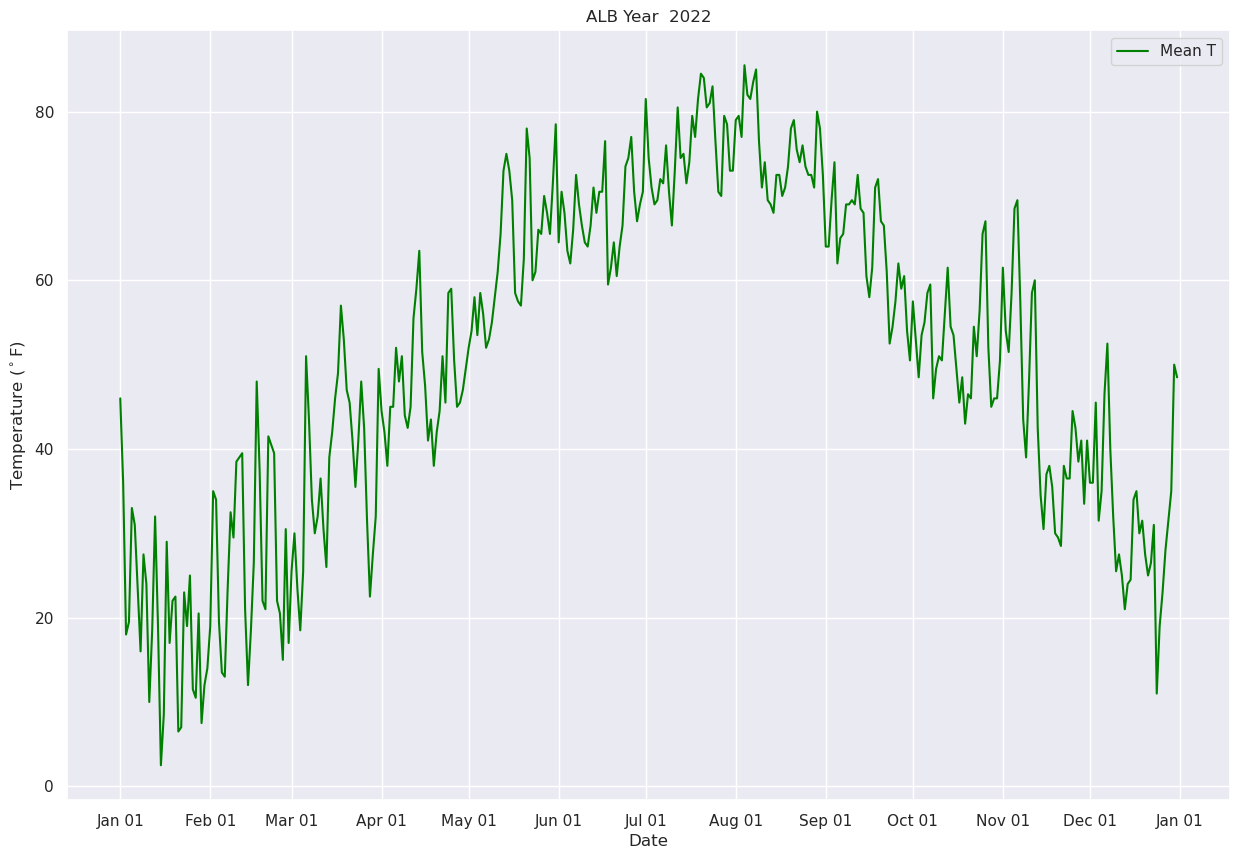

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, meanT, color='green',label = "Mean T")
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

Next, let's use Pandas' `rolling` method to calculate the mean over a specified number of days. We'll center the window at the midpoint of each period (thus, for a 30-day window, the first plotted point will be on Jan. 16 ... covering the Jan. 1 --> Jan. 30 timeframe.

In [42]:
meanTr5 = meanT.rolling(window=5, center=True)
meanTr10 = meanT.rolling(window=10, center=True)
meanTr15 = meanT.rolling(window=15, center=True)
meanTr30 = meanT.rolling(window=30, center=True)

In [43]:
meanTr30.mean()

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
360   NaN
361   NaN
362   NaN
363   NaN
364   NaN
Length: 365, dtype: float64

In [44]:
meanTr5.mean()

0       NaN
1       NaN
2      30.5
3      27.5
4      25.0
       ... 
360    27.3
361    33.5
362    38.6
363     NaN
364     NaN
Length: 365, dtype: float64

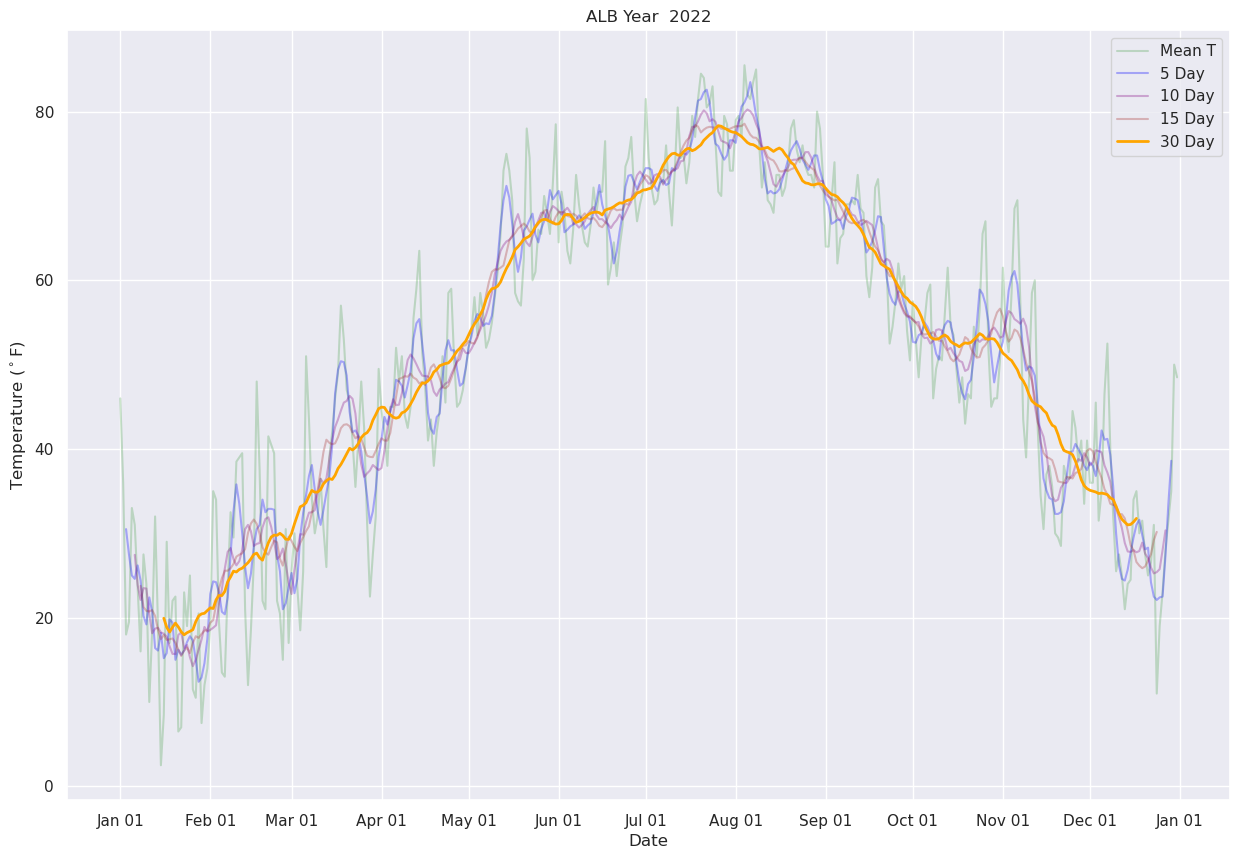

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, meanT, color='green',label = "Mean T",alpha=0.2)
ax.plot (date, meanTr5.mean(), color='blue',label = "5 Day", alpha=0.3)
ax.plot (date, meanTr10.mean(), color='purple',label = "10 Day", alpha=0.3)
ax.plot (date, meanTr15.mean(), color='brown',label = "15 Day", alpha=0.3)
ax.plot (date, meanTr30.mean(), color='orange',label = "30 Day", alpha=1.0, linewidth=2)
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

Display just the daily and 30-day running mean.

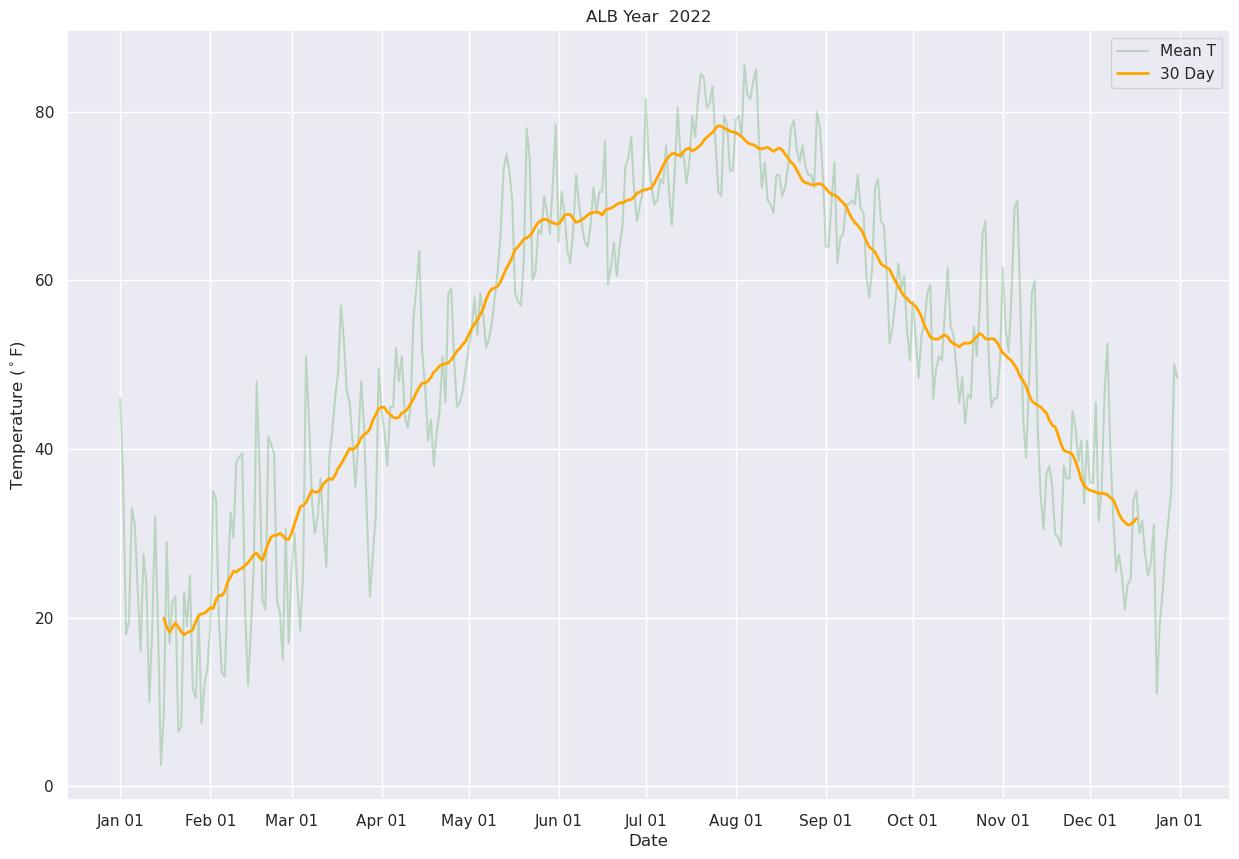

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, meanT, color='green',label = "Mean T",alpha=0.2)
ax.plot (date, meanTr30.mean(), color='orange',label = "30 Day", alpha=1.0, linewidth=2)
ax.set_title ("ALB Year  %d" % year)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")